<a href="https://colab.research.google.com/github/julienjamme/comparing_maps/blob/main/notebooks/Spatial_KWD_with_R_Tutorial_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using the Spatial-KWD with R
This notebook shows how to use the Spatial-KWD library within the [R programming language](https://www.r-project.org/).

To run this notebook in Google Colab, please, be sure that the from the menu of this notebook, under *Runtime->Change Runtime type->..* the runtime is set to **R** so that you can execute the **R** scripts of this notebook.

The source code of the library is freely available on GitHub at [Eurostat/Spatial-KWD](https://github.com/eurostat/Spatial-KWD).


### Prerequisities
The only requirement for compiling the Spatial-KWD library is the R package [Rcpp](https://cran.r-project.org/web/packages/Rcpp/index.html), which can be installed with the following command.

In [1]:
install.packages("Rcpp", repos='http://cran.us.r-project.org')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



### Install the R library from CRAN
The official release of **SpatialKWD** is available from [CRAN](https://cran.r-project.org/web/checks/check_results_SpatialKWD.html), and it can installed with the following command:

In [2]:
install.packages("SpatialKWD")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Example: Passing input data via matrices
Once you have installed the Spatial-KWD library, you can run the following script to compute the KW-distance between a pair of histograms stored in two matrices.

The main helper functions are:

* `compareOneToOne`
* `compareOneToMany`
* `compareAll`
* `focusaArea`

To see the manual run `help(compareOneToOne)`. Note that on Colab the manual is not correctly formatted, but if you use the **SpatialKWD** library in RStudio, everything will be as expected.


In [3]:
library(SpatialKWD)
help(compareOneToOne)

In [4]:
# Random coordinates
set.seed(4081789)
N = 900
Xs <- 5*as.integer(runif(N, 0, 31))
Ys <- 5*as.integer(runif(N, 0, 31))
coordinates <- matrix(c(Xs, Ys), ncol=2)

# Random weights
test1 <- matrix(runif(2*N, 0, 1), ncol=2)
m <- 3
test2 <- matrix(runif((m+1)*N, 0, 1), ncol=(m+1))
test3 <- matrix(runif(m*N, 0, 1), ncol=m)

# Compute distance
print("Compare one-to-one with exact algorithm:")
d <- compareOneToOne(coordinates, Weights=test1, method="exact", recode=TRUE, verbosity = "info")
cat("runtime:", d$runtime, " distance:", d$distance, " nodes:", d$nodes, " arcs:", d$arcs, "\n")

print("Compare one-to-one with approximate algorithm:")
d <- compareOneToOne(coordinates, Weights=test1, L=2, recode=TRUE)
cat("L: 2, runtime:", d$runtime, " distance:", d$distance, " nodes:", d$nodes, " arcs:", d$arcs, "\n")

d <- compareOneToOne(coordinates, Weights=test1, L=3)
cat("L: 3 runtime:", d$runtime, " distance:", d$distance, "\n")

[1] "Compare one-to-one with exact algorithm:"
CompareOneToOne, Solution method: EXACT
INFO: Recoding the input coordinates to consecutive integers.
Internal parameters: exact mincostflow colgen info 14400.000 0.000001 true 0 179769313486231570814527423731704356798070567525844996598917476803157260780028538760589558632766878171540458953514382464234321326889464182768467546703537516986049910576551282076245490090389328944075868508455133942304583236903222948165808559332123348274797826204144723168738177180919299881250404026184124858368.0, 1
INFO: change <timelimit> to 14400.000000
INFO: change <verbosity> to info
INFO: change <opt_tolerance> to 0.000001
runtime: 0.224  distance: 0.7667916  nodes: 956  arcs: 1906 
[1] "Compare one-to-one with approximate algorithm:"
CompareOneToOne, Solution method: APPROX
INFO: Recoding the input coordinates to consecutive integers.
INFO: change <timelimit> to 14400.000000
INFO: change <verbosity> to silent
INFO: change <opt_tolerance> to 0.000001
L: 2, runt

## test 4 : Result for two identical maps

Expected: a null distance

In [5]:
run_test <- function(coords, tests, verbose = TRUE){
  d_exact <- compareOneToOne(coords, Weights=tests, method="exact", recode=TRUE, verbosity = "silent")
  d_approx <- compareOneToOne(coords, Weights=tests, method="approx", recode=TRUE, verbosity = "silent")
  if(verbose) cat("result of exact method:", d_exact$distance, "\nresult of approx method:", d_approx$distance)
  return(data.frame(dist_exact = d_exact$distance, dist_approx = d_approx$distance))
}

In [6]:
coordinates <- matrix(c(Xs, Ys), ncol=2)
test4 <- matrix(rep(runif(N, 0, 1),2), ncol=2)

res <- suppressMessages({run_test(coordinates, test4)})
res


CompareOneToOne, Solution method: EXACT
INFO: Recoding the input coordinates to consecutive integers.
INFO: change <timelimit> to 14400.000000
INFO: change <verbosity> to silent
INFO: change <opt_tolerance> to 0.000001
CompareOneToOne, Solution method: APPROX
INFO: Recoding the input coordinates to consecutive integers.
INFO: change <timelimit> to 14400.000000
INFO: change <verbosity> to silent
INFO: change <opt_tolerance> to 0.000001
result of exact method: 0 
result of approx method: 0

dist_exact,dist_approx
<dbl>,<dbl>
0,0


In [7]:
run_simul_test4 <- function(Nsim){
  test4 <- matrix(rep(runif(N, 0, 1),2), ncol=2)
  res <- purrr::map_dfr(1:Nsim, \(i) run_test(coords=coordinates, tests=test4, verbose = FALSE))
  return(list(mean = apply(res, 2, mean), sd = apply(res, 2, sd)))
}

In [8]:
res_sim_test4 <- run_simul_test4(10)

CompareOneToOne, Solution method: EXACT
INFO: Recoding the input coordinates to consecutive integers.
INFO: change <timelimit> to 14400.000000
INFO: change <verbosity> to silent
INFO: change <opt_tolerance> to 0.000001
CompareOneToOne, Solution method: APPROX
INFO: Recoding the input coordinates to consecutive integers.
INFO: change <timelimit> to 14400.000000
INFO: change <verbosity> to silent
INFO: change <opt_tolerance> to 0.000001
CompareOneToOne, Solution method: EXACT
INFO: Recoding the input coordinates to consecutive integers.
INFO: change <timelimit> to 14400.000000
INFO: change <verbosity> to silent
INFO: change <opt_tolerance> to 0.000001
CompareOneToOne, Solution method: APPROX
INFO: Recoding the input coordinates to consecutive integers.
INFO: change <timelimit> to 14400.000000
INFO: change <verbosity> to silent
INFO: change <opt_tolerance> to 0.000001
CompareOneToOne, Solution method: EXACT
INFO: Recoding the input coordinates to consecutive integers.
INFO: change <timeli

In [9]:
res_sim_test4

$mean
 dist_exact dist_approx 
          0           0 

$sd
 dist_exact dist_approx 
          0           0

## Test 5: compare two maps with same proportions of 1 and x but not equally spatially distributed

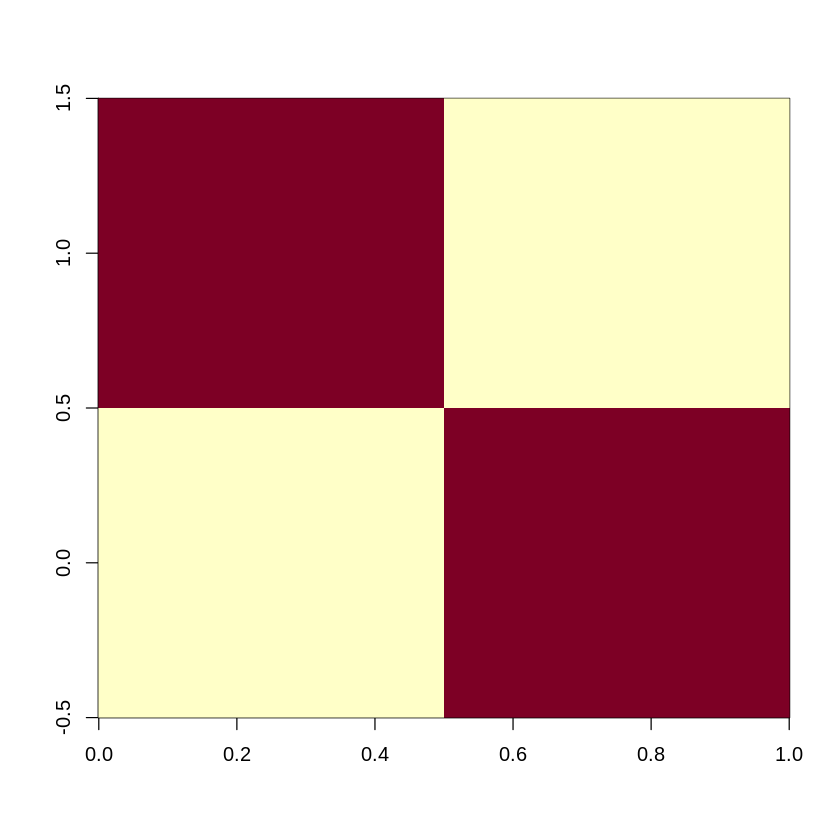

In [21]:
par(mfrow = c(1,2))
image(matrix(c(rep(1,N/2),rep(2,N/2),rep(2,N/2),rep(1,N/2)), ncol=2))

In [19]:
library(dplyr)
res_test5 <- purrr::map_dfr(
  c(seq(0,10,0.5),seq(20,100,10)),
  \(x){
    test5 <- matrix(c(rep(1,N/2),rep(x,N/2),rep(x,N/2),rep(1,N/2)), ncol=2)
    run_test(coords=coordinates, tests=test5, verbose = FALSE) %>%
      mutate(x=x)
  }%>%
    mutate(across(starts_with("dist_"), list(mean = mean)))
)

CompareOneToOne, Solution method: EXACT
INFO: Recoding the input coordinates to consecutive integers.
INFO: change <timelimit> to 14400.000000
INFO: change <verbosity> to silent
INFO: change <opt_tolerance> to 0.000001
CompareOneToOne, Solution method: APPROX
INFO: Recoding the input coordinates to consecutive integers.
INFO: change <timelimit> to 14400.000000
INFO: change <verbosity> to silent
INFO: change <opt_tolerance> to 0.000001
CompareOneToOne, Solution method: EXACT
INFO: Recoding the input coordinates to consecutive integers.
INFO: change <timelimit> to 14400.000000
INFO: change <verbosity> to silent
INFO: change <opt_tolerance> to 0.000001
CompareOneToOne, Solution method: APPROX
INFO: Recoding the input coordinates to consecutive integers.
INFO: change <timelimit> to 14400.000000
INFO: change <verbosity> to silent
INFO: change <opt_tolerance> to 0.000001
CompareOneToOne, Solution method: EXACT
INFO: Recoding the input coordinates to consecutive integers.
INFO: change <timeli

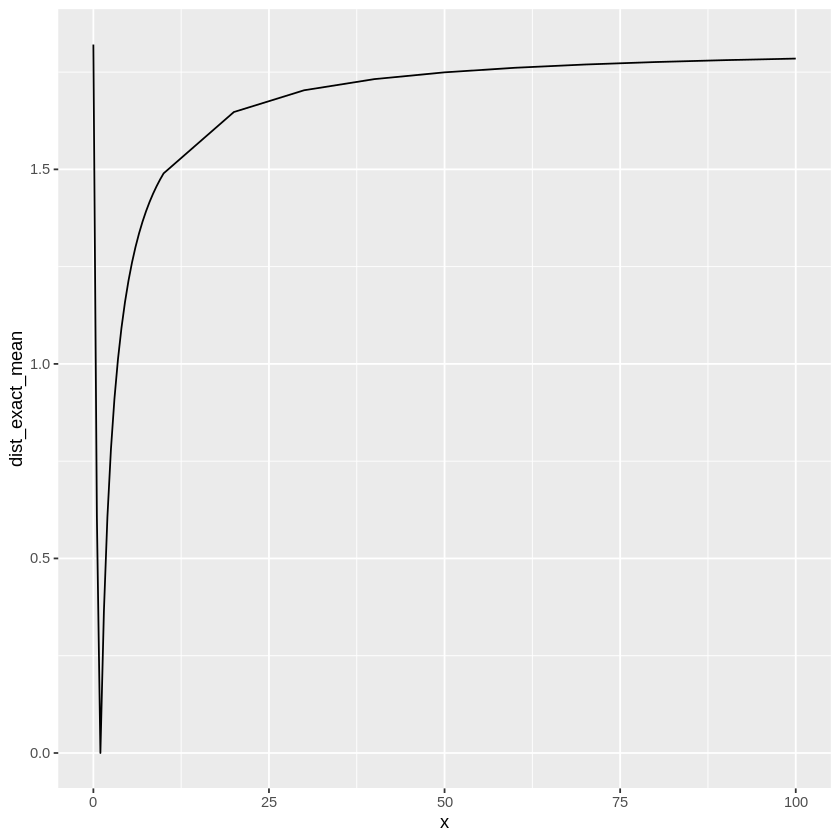

In [20]:
library(ggplot2)
res_test5 %>%
  ggplot() +
  geom_path(aes(x=x,y=dist_exact_mean))

=> maybe standardize the weigths is more efficient

In [18]:
d_approx10

$distance
[1] 0

$runtime
[1] 0.002

$iterations
[1] 0

$nodes
[1] 956

$arcs
[1] 0

$status
[1] "Optimal"

### Feedback
Please, for any comments, contact the author of the Spatial-KWD library.

### References

[1] Bassetti F., Gualandi S., Veneroni M. (2018): [**On the computation of Kantorovich-Wasserstein distances between 2D-histograms by uncapacitated minimum cost flows**](https://epubs.siam.org/doi/abs/10.1137/19M1261195). SIAM J. Optim., 30(3), 2441–2469, 2020. Preprint on arXiv: [1804.00445](https://arxiv.org/abs/1804.00445).